In [2]:
# source: http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/


In [3]:
# https://en.wikipedia.org/wiki/Test_functions_for_optimization 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize

In [30]:
def f(x, y):
    """Three-hump camel function with 3 local minimums and 1 global miminum (0, 0, 0)
    """
    return 2* x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

In [22]:
xmin, xmax, xstep = -4, 4, .1
ymin, ymax, ystep = xmin, xmax, xstep
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
minima = np.array([0.,0.])
minima_ = minima.reshape(-1, 1)

In [23]:
#  if rstride and cstride are not 1, not all the points are used to draw the surface.
# color map: https://matplotlib.org/stable/tutorials/colors/colormaps.html

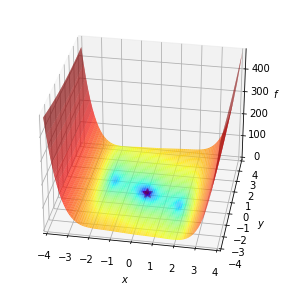

In [24]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=30, azim=-80)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()


In [10]:
# We use autograd to compute the gradient vector field, and plot it with Matplotlib's quiver method.

In [25]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

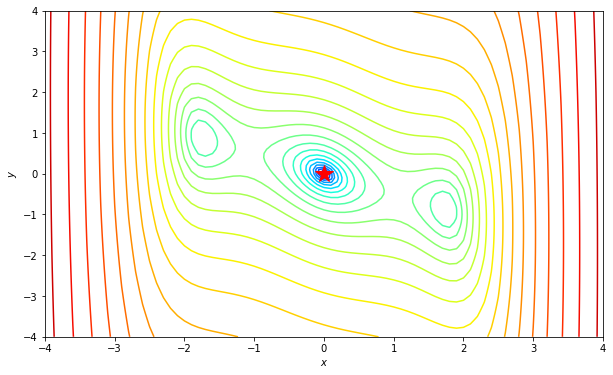

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(-3, 3, 30), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

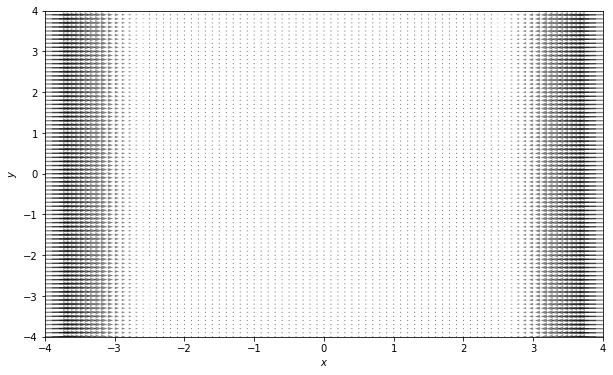

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [44]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [110]:
def plot_path(path, method):

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(-3, 3, 30), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k', label=method)
    ax.plot(*minima_, 'r*', markersize=10)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend()

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

In [111]:
def visualize_opt(method='Newton-CG'):
    x0 = np.array([3., 3.])
    # now f recieves two parameters 
    func = value_and_grad(lambda args: f(*args))
    path = [x0]
    res = minimize(func, x0=x0, method=method,jac=True, tol=1e-20, callback=make_minimize_cb(path))

    print(f"method: {method}, success: {res.success} ", )
    path = np.array(path).T
    plot_path(path, method)


In [112]:
methods = [
    "CG",
    "BFGS",
    "Newton-CG",
    "L-BFGS-B",
    "TNC",
]

method: CG, success: True 
method: BFGS, success: False 
method: Newton-CG, success: True 
method: L-BFGS-B, success: True 
method: TNC, success: True 


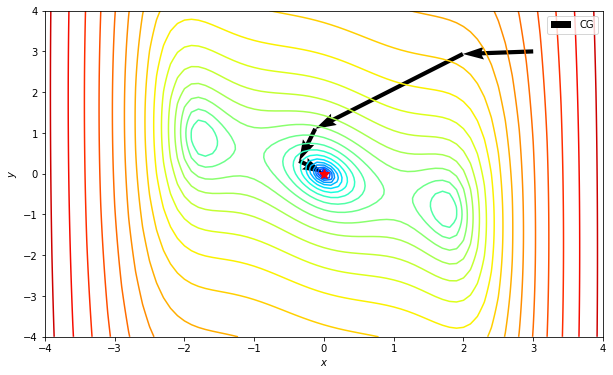

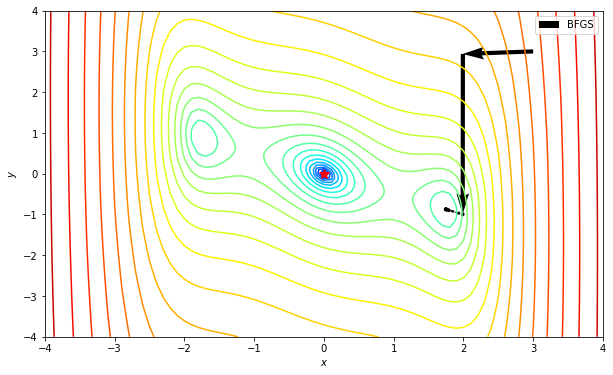

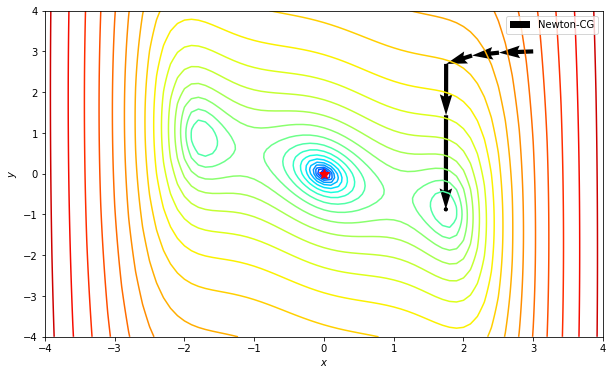

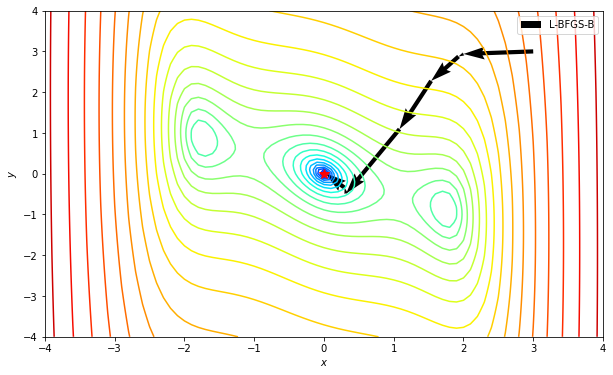

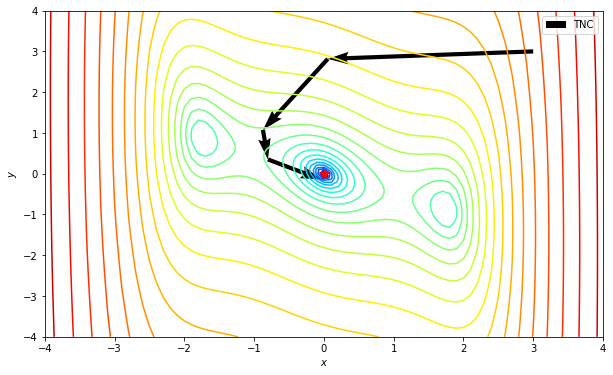

In [113]:
for method in methods:
    visualize_opt(method)